# Setup

In [2]:
system("sudo su -c 'curl https://packages.microsoft.com/config/rhel/7/prod.repo > /etc/yum.repos.d/mssql-release.repo && exit'")
system("sudo yum remove unixODBC-utf16 unixODBC-utf16-devel")
system("sudo ACCEPT_EULA=Y yum install -y msodbcsql17")
system("sudo ACCEPT_EULA=Y yum install -y mssql-tools")
system("echo 'export PATH='$PATH:/opt/mssql-tools/bin'' >> ~/.bashrc")
system("source ~/.bashrc")
system("sudo yum install -y unixODBC-devel")

In [1]:
#install.packages("odbc")
#install.packages("DBI")
#install.packages("rstudioapi")

library(odbc)
library(dplyr)
library(stringr)
library(tidyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
file_path <- '/home/ec2-user/SageMaker/db-credentials.txt'
db_creds_df <- read.table(file_path)
db_creds <- db_creds_df$V3
names(db_creds) <- db_creds_df$V1
db_creds <- trimws(db_creds)
#db_creds

In [5]:
# load database
db <- 'S35'

In [6]:
connection_string = paste0("DRIVER={ODBC Driver 17 for SQL Server};",
                          "SERVER=", db_creds['host'], ',', db_creds['port'], ';',
                          "DATABASE=", db, ';',
                          "UID=", db_creds['username'], ';',
                          "PWD={", db_creds['password'], "};")

#connection_string

In [7]:
db_conn <- DBI::dbConnect(odbc::odbc(), .connection_string = connection_string)

In [2]:
load('/home/ec2-user/SageMaker/complete.RData')

In [99]:
ls()

[1] "complete.demo"  "Deptree"        "phqdefdep"      "phqdep"        
[5] "phqdfproviders" "providers"

# Demographics

In [2]:
load('/home/ec2-user/SageMaker/phqdf_ready.RData')

In [8]:

#install.packages("ggmosaic")
library(ggmosaic)
library(vcd)

Loading required package: grid


Attaching package: ‘vcd’


The following objects are masked from ‘package:ggmosaic’:

    mosaic, spine




In [79]:
phqdfproviders %>% colnames()

[1] "phqPT"                 "PhqScore"              "phqEnc"               
 [4] "AdminDate.x"           "INSTANCE_NUM"          "CONCEPT_CD"           
 [7] "HEALTH_SYSTEM_ID"      "PROVIDER_ID"           "BMI"                  
[10] "SystolicBP"            "DiastolicBP"           "Audit"                
[13] "Phq2"                  "Diabetes"              "NA"                   
[16] "Obesity"               "Hyperlipidemia"        "Depressed"            
[19] "Bipolar"               "Anxiety"               "Alcohol"              
[22] "Sleep"                 "SUD"                   "Tobacco"              
[25] "SchizophreniaSpectrum" "Adjustment"            "EatingDisorders"      
[28] "Hypertension"          "PTSD"                  "AdminDate.y"          
[31] "phqDepressed"          "phqSevereDepressed"    "DepAny"               
[34] "Age"                   "FPL"                   "Marital"              
[37] "Gender"                "Race"                  "Rural"                
[40] "Sex"                   "Sexor"                 "X"                    
[43] "L1"                    "L2"                    "L3"                   
[46] "phqDefDepressed"

In [80]:
RaceDepressed<-table(phqdfproviders$Race,phqdfproviders$Depressed)
RacephqDepressed<-table(phqdfproviders$Race,phqdfproviders$phqDepressed)
RaceSevDepressed<-table(phqdfproviders$Race,phqdfproviders$phqSevereDepressed)
RaceDefDepressed<-table(phqdfproviders$Race,phqdfproviders$phqDefDepressed)

In [83]:
save(RaceDepressed,RacephqDepressed,RaceSevDepressed,RaceDefDepressed,file="Tables/RaceDepressedCounts.RData")

In [88]:
ProvidersDepressed<-table(phqdfproviders$L1,phqdfproviders$Depressed)
save(ProvidersDepressed,RacephqDepressed,RaceSevDepressed,RaceDefDepressed,file="Tables/ProviderDepressedCounts.RData")

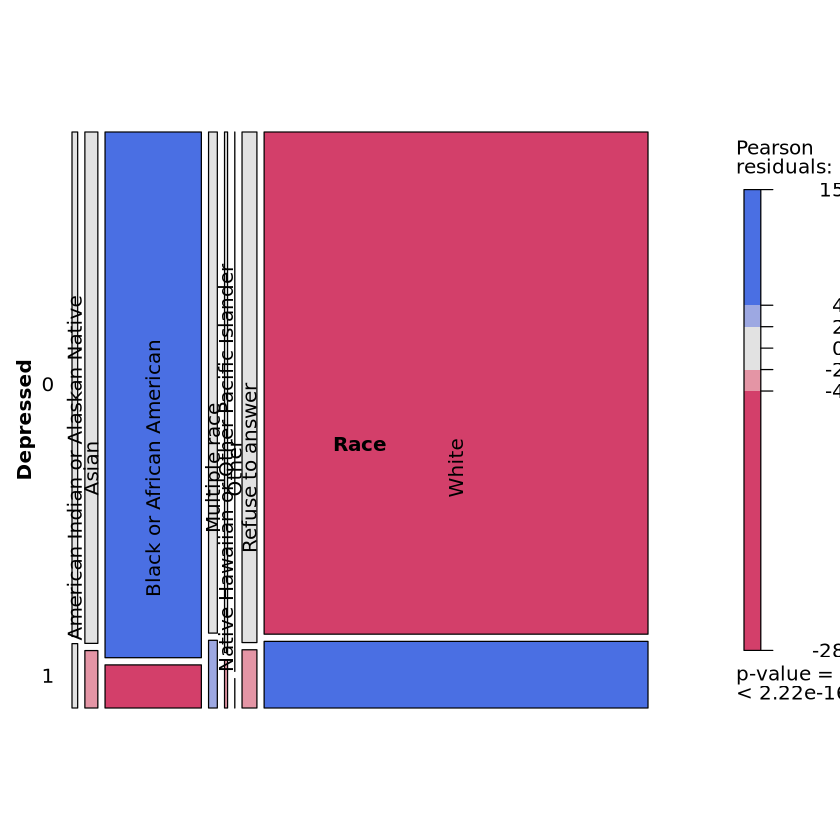

In [75]:
#png('Graphs/RaceDepression2.png')
par(mar = c(8, 8, 4.1, 3))
mosaic(data=phqdfproviders,~Race+Depressed, split_vertical=TRUE,rot_labels=c(90,0,0,0),offset_label=c(-15,0,0, 0),shade=TRUE)
#dev.off()

In [104]:
phqdfproviders %>% ungroup() %>%  str()

tibble [644,391 × 46] (S3: tbl_df/tbl/data.frame)
 $ phqPT                : num [1:644391] 555 560 597 598 604 606 635 639 647 659 ...
 $ PhqScore             : num [1:644391] 21 19 12 6 19 10 10 8 14 18 ...
 $ phqEnc               : num [1:644391] 35344548 32305700 36324101 90218192 95238030 ...
 $ AdminDate.x          : POSIXct[1:644391], format: "2014-08-08" "2013-08-05" ...
 $ INSTANCE_NUM         : int [1:644391] 1 1 1 1 1 10 12 1 1 1 ...
 $ CONCEPT_CD           : chr [1:644391] "ICD9CM:300.00" "ICD9CM:311" "ICD10CM:E11.9" "PRO:ADV0014   " ...
 $ HEALTH_SYSTEM_ID     : chr [1:644391] "692" "564" "692" "687" ...
 $ PROVIDER_ID          : chr [1:644391] "2949F791-E57E-494D-9A3C-2F742E5044BF" "AE5F21AE-72A1-4004-9F4C-3B29714EE261" "3092A7ED-5F6D-4E0F-A2D5-FF0EDEF75028" "BD10245B-0C1D-43BE-B355-558C7D5E8F4A" ...
 $ BMI                  : num [1:644391] 28.5 38.2 29.1 36 28.6 ...
 $ SystolicBP           : num [1:644391] 118 140 124 135 161 140 104 142 112 100 ...
 $ DiastolicBP        

In [123]:
fortableone<-phqdfproviders %>% ungroup() %>% select(-CONCEPT_CD,-PROVIDER_ID,-AdminDate.x,-AdminDate.y,-phqEnc,-phqPT,-INSTANCE_NUM,-`NA`,-X) %>% 
mutate(across(c(Diabetes:DepAny,L1:phqDefDepressed),~factor(.))) %>% filter(Age>=18|Age<100)

In [ ]:
broadtableone<-CreateTableOne(data=fortableone)

In [128]:
stratDeptableone<-CreateTableOne(data=fortableone,strata="Depressed")
stratphqDeptableone<-CreateTableOne(data=fortableone,strata="phqDepressed")


In [130]:
save(broadtableone,stratDeptableone,stratphqDeptableone,file="Tables/DemoTables.RData")

Using a score of 26 or 27, still only 25% of patients were categorized as depressed

In [96]:
complete.demo %>% group_by(Depressed) %>% tally(phqDefDepressed)

Depressed n    
1 0         14163
2 1          4948

In [98]:
library(rpart)
#install.packages("rpart.plot")
#install.packages("rattle")
#install.packages("tableone")
library(tableone)
library(rpart.plot)

In [16]:
providers<-read.csv('/home/ec2-user/SageMaker/providersepped.csv')
complete.demo<-complete.demo %>% left_join(providers)

Joining with `by = join_by(PROVIDER_ID)`


## Decision Tree

In [131]:
DeptreeAll<-phqdfproviders %>% filter(Age>=18|Age<100) 

In [178]:
DeptreeAll<-DeptreeAll %>% mutate(across(c(Diabetes:DepAny,L1:phqDefDepressed),~factor(.)))

In [140]:
# create index list for Deptree columns
DeptreeFeatures<-data.frame(Name=colnames(DeptreeAll),Index=1:length(colnames(DeptreeAll)))

In [142]:
DeptreeFeatures

Name                  Index
1  phqPT                  1   
2  PhqScore               2   
3  phqEnc                 3   
4  AdminDate.x            4   
5  INSTANCE_NUM           5   
6  CONCEPT_CD             6   
7  HEALTH_SYSTEM_ID       7   
8  PROVIDER_ID            8   
9  BMI                    9   
10 SystolicBP            10   
11 DiastolicBP           11   
12 Audit                 12   
13 Phq2                  13   
14 Diabetes              14   
15 NA                    15   
16 Obesity               16   
17 Hyperlipidemia        17   
18 Depressed             18   
19 Bipolar               19   
20 Anxiety               20   
21 Alcohol               21   
22 Sleep                 22   
23 SUD                   23   
24 Tobacco               24   
25 SchizophreniaSpectrum 25   
26 Adjustment            26   
27 EatingDisorders       27   
28 Hypertension          28   
29 PTSD                  29   
30 AdminDate.y           30   
31 phqDepressed          31   
32 phqSevereDepressed    32   
33 DepAny                33   
34 Age                   34   
35 FPL                   35   
36 Marital               36   
37 Gender                37   
38 Race                  38   
39 Rural                 39   
40 Sex                   40   
41 Sexor                 41   
42 X                     42   
43 L1                    43   
44 L2                    44   
45 L3                    45   
46 phqDefDepressed       46

In [247]:
DeptreeSRFs<-DeptreeFeatures %>% slice(2,12,13,18)
DeptreeMHFs<-DeptreeFeatures %>% slice(18:29)
DeptreeSomFs<-DeptreeFeatures %>% slice(14,16,17,18)
DeptreeVitalFs<-DeptreeFeatures %>% slice(9,10,11,18)
DeptreeDemoFs<-DeptreeFeatures %>% slice(34:41,18)
DeptreeProvidFs<-DeptreeFeatures %>% slice(7,44,18)




In [147]:
DeptreeSRFeatures

Name     Index
1 PhqScore  2   
2 Audit    12   
3 Phq2     13

In [152]:
install.packages("splitTools")
library(splitTools)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [177]:
str(DeptreeAll)

gropd_df [461,605 × 46] (S3: grouped_df/tbl_df/tbl/data.frame)
 $ phqPT                : num [1:461605] 555 560 597 604 606 635 647 659 711 730 ...
 $ PhqScore             : num [1:461605] 21 19 12 19 10 10 14 18 22 14 ...
 $ phqEnc               : num [1:461605] 35344548 32305700 36324101 95238030 36294290 ...
 $ AdminDate.x          : POSIXct[1:461605], format: "2014-08-08" "2013-08-05" ...
 $ INSTANCE_NUM         : int [1:461605] 1 1 1 1 10 12 1 1 1 1 ...
 $ CONCEPT_CD           : chr [1:461605] "ICD9CM:300.00" "ICD9CM:311" "ICD10CM:E11.9" "ICD10CM:I10" ...
 $ HEALTH_SYSTEM_ID     : chr [1:461605] "692" "564" "692" "601" ...
 $ PROVIDER_ID          : chr [1:461605] "2949F791-E57E-494D-9A3C-2F742E5044BF" "AE5F21AE-72A1-4004-9F4C-3B29714EE261" "3092A7ED-5F6D-4E0F-A2D5-FF0EDEF75028" "5AD4551C-A5A9-4468-A8B0-537EE1DA6A49" ...
 $ BMI                  : num [1:461605] 28.5 38.2 29.1 28.6 29.7 ...
 $ SystolicBP           : num [1:461605] 118 140 124 161 140 104 112 100 107 126 ...
 $ Diast

In [179]:
DepModel<- partition(DeptreeAll$phqEnc, p = c(train = 0.6, valid = 0.2, test = 0.2))

In [234]:
# unadjusted model
DepSR<-rpart(Depressed~.,data=DeptreeAll[DepModel$train,c("Depressed","PhqScore","Phq2","Audit")])

In [235]:
DepSR
printcp(DepSR)
summary(DepSR)

n= 276960 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 276960 29950 0 (0.8918616 0.1081384) *


Classification tree:
rpart(formula = Depressed ~ ., data = DeptreeAll[DepModel$train, 
    c("Depressed", "PhqScore", "Phq2", "Audit")])

Variables actually used in tree construction:
character(0)

Root node error: 29950/276960 = 0.10814

n= 276960 

  CP nsplit rel error xerror xstd
1  0      0         1      0    0
Call:
rpart(formula = Depressed ~ ., data = DeptreeAll[DepModel$train, 
    c("Depressed", "PhqScore", "Phq2", "Audit")])
  n= 276960 

  CP nsplit rel error xerror xstd
1  0      0         1      0    0

Node number 1: 276960 observations
  predicted class=0  expected loss=0.1081384  P(node) =1
    class counts: 247010 29950
   probabilities: 0.892 0.108 



In [236]:
# gini adjusted model. it makes no difference
DepSR.gini<-rpart(Depressed~.,data=DeptreeAll[DepModel$train,c("Depressed","PhqScore","Phq2","Audit")],parms=list(split="information"))
summary(DepSR.gini)

Call:
rpart(formula = Depressed ~ ., data = DeptreeAll[DepModel$train, 
    c("Depressed", "PhqScore", "Phq2", "Audit")], parms = list(split = "information"))
  n= 276960 

  CP nsplit rel error xerror xstd
1  0      0         1      0    0

Node number 1: 276960 observations
  predicted class=0  expected loss=0.1081384  P(node) =1
    class counts: 247010 29950
   probabilities: 0.892 0.108 



In [237]:
# setting values for minbucket (leaf size) and cp. First build complete tree then prune
DepSR.cp1<-rpart(Depressed~.,data=DeptreeAll[DepModel$train,c("Depressed","PhqScore","Phq2","Audit")],parms=list(split="information"),control=rpart.control(minsplit=0,cp=0))



Classification tree:
rpart(formula = Depressed ~ ., data = DeptreeAll[DepModel$train, 
    c("Depressed", "PhqScore", "Phq2", "Audit")], parms = list(split = "information"), 
    control = rpart.control(minsplit = 0, cp = 0))

Variables actually used in tree construction:
[1] Audit    Phq2     PhqScore

Root node error: 29950/276960 = 0.10814

n= 276960 

           CP nsplit rel error xerror      xstd
1  5.6205e-04      0   1.00000 1.0000 0.0054570
2  6.6778e-05     24   0.98290 1.0000 0.0054570
3  4.8229e-05     25   0.98284 1.0003 0.0054578
4  3.3389e-05     43   0.98197 1.0003 0.0054578
5  1.6694e-05     46   0.98187 1.0008 0.0054589
6  1.5410e-05     60   0.98164 1.0019 0.0054614
7  1.3356e-05     73   0.98144 1.0021 0.0054619
8  1.1130e-05     83   0.98130 1.0033 0.0054650
9  8.3472e-06    128   0.98077 1.0040 0.0054665
10 7.4198e-06    163   0.98047 1.0050 0.0054689
11 7.1548e-06    172   0.98040 1.0057 0.0054707
12 6.6778e-06    186   0.98030 1.0057 0.0054707
13 6.0707e-06    

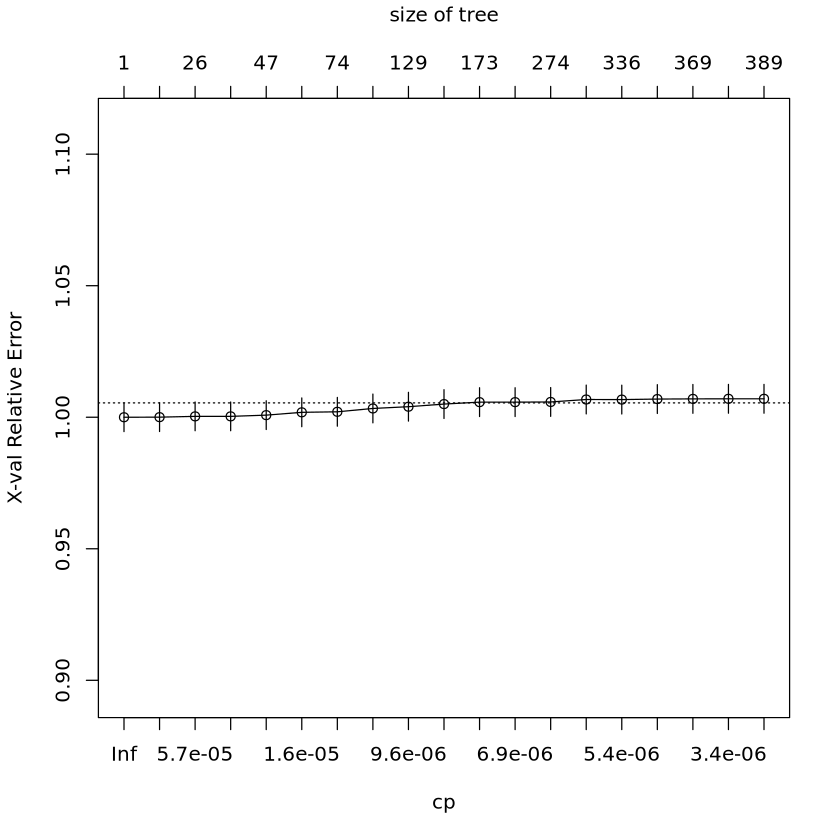

In [238]:
printcp(DepSR.cp1)
plotcp(DepSR.cp1)

In [243]:
# cp modified model
DepSR.cp2<-rpart(Depressed~.,data=DeptreeAll[DepModel$train,c("Depressed","PhqScore","Phq2","Audit")],parms=list(split="gini"),control=rpart.control(minbucket=0,cp=.000066))


In [244]:
printcp(DepSR.cp2)



Classification tree:
rpart(formula = Depressed ~ ., data = DeptreeAll[DepModel$train, 
    c("Depressed", "PhqScore", "Phq2", "Audit")], parms = list(split = "gini"), 
    control = rpart.control(minbucket = 0, cp = 6.6e-05))

Variables actually used in tree construction:
[1] Audit    Phq2     PhqScore

Root node error: 29950/276960 = 0.10814

n= 276960 

          CP nsplit rel error xerror     xstd
1 0.00042452      0   1.00000      1 0.005457
2 0.00017947     20   0.98708      1 0.005457
3 0.00006600     28   0.98564      1 0.005457


In [245]:
DepSR.cp2
summary(DepSR.cp2)

n= 276960 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

     1) root 276960 29950 0 (0.89186164 0.10813836)  
       2) PhqScore< 8.5 111468  2773 0 (0.97512291 0.02487709) *
       3) PhqScore>=8.5 165492 27177 0 (0.83578058 0.16421942)  
         6) PhqScore< 15.5 85678 11089 0 (0.87057354 0.12942646)  
          12) PhqScore< 12.5 47267  5474 0 (0.88418982 0.11581018) *
          13) PhqScore>=12.5 38411  5615 0 (0.85381792 0.14618208)  
            26) Audit>=11.5 816    54 0 (0.93382353 0.06617647) *
            27) Audit< 11.5 37595  5561 0 (0.85208139 0.14791861)  
              54) Phq2< 3.5 20178  2816 0 (0.86044207 0.13955793)  
               108) PhqScore< 14.5 16145  2163 0 (0.86602663 0.13397337)  
                 216) Phq2< 1.5 992   117 0 (0.88205645 0.11794355)  
                   432) PhqScore< 13.5 596    60 0 (0.89932886 0.10067114) *
                   433) PhqScore>=13.5 396    57 0 (0.85606061 0.14393939)  
                     866) Audi

Call:
rpart(formula = Depressed ~ ., data = DeptreeAll[DepModel$train, 
    c("Depressed", "PhqScore", "Phq2", "Audit")], parms = list(split = "gini"), 
    control = rpart.control(minbucket = 0, cp = 6.6e-05))
  n= 276960 

            CP nsplit rel error   xerror        xstd
1 0.0004245171      0 1.0000000 1.000000 0.005456954
2 0.0001794658     20 0.9870785 1.000000 0.005456954
3 0.0000660000     28 0.9856427 1.000033 0.005457035

Variable importance
PhqScore     Phq2    Audit 
      84       16        1 

Node number 1: 276960 observations,    complexity param=0.0004245171
  predicted class=0  expected loss=0.1081384  P(node) =1
    class counts: 247010 29950
   probabilities: 0.892 0.108 
  left son=2 (111468 obs) right son=3 (165492 obs)
  Primary splits:
      PhqScore < 8.5  to the left,  improve=2586.463000, (0 missing)
      Phq2     < 2.5  to the left,  improve=1601.610000, (69167 missing)
      Audit    < 0.5  to the left,  improve=   8.453275, (253638 missing)
  Surrogate 

To conclude, use of phqscore provides little help in deciding to diagnose with depression. Seems largely due to the fact that it is hard to get a dx in the first place. Instead of SR variables, can turn to medical diagnoses, other MH conditions, and then the combination. Also using Audit alone or Phq alone gives nothing As follows: 
1) Medical
2) MH
3) MH + Medical

In [272]:
# no need for unadjusted model. it doesn't yield anything
DepMed<-rpart(Depressed~.,data=DeptreeAll[DepModel$train,DeptreeSomFs$Index],parms=list(split="gini"),control=rpart.control(minbucket=0,cp=0))

In [273]:
DepMed
printcp(DepMed)
summary(DepMed)

n= 276960 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 276960 29950 0 (0.8918616 0.1081384) *


Classification tree:
rpart(formula = Depressed ~ ., data = DeptreeAll[DepModel$train, 
    DeptreeSomFs$Index], parms = list(split = "gini"), control = rpart.control(minbucket = 0, 
    cp = 0))

Variables actually used in tree construction:
character(0)

Root node error: 29950/276960 = 0.10814

n= 276960 

  CP nsplit rel error xerror xstd
1  0      0         1      0    0
Call:
rpart(formula = Depressed ~ ., data = DeptreeAll[DepModel$train, 
    DeptreeSomFs$Index], parms = list(split = "gini"), control = rpart.control(minbucket = 0, 
    cp = 0))
  n= 276960 

  CP nsplit rel error xerror xstd
1  0      0         1      0    0

Node number 1: 276960 observations
  predicted class=0  expected loss=0.1081384  P(node) =1
    class counts: 247010 29950
   probabilities: 0.892 0.108 



#### Model with mental health conditions

In [274]:
# no need for unadjusted model. it doesn't yield anything
DepMH<-rpart(Depressed~.,data=DeptreeAll[DepModel$train,DeptreeMHFs$Index],parms=list(split="gini"),control=rpart.control(minbucket=0,cp=0))

In [276]:
DepMH
printcp(DepMH)
summary(DepMH)

n= 276960 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 276960 29950 0 (0.8918616 0.1081384) *


Classification tree:
rpart(formula = Depressed ~ ., data = DeptreeAll[DepModel$train, 
    DeptreeMHFs$Index], parms = list(split = "gini"), control = rpart.control(minbucket = 0, 
    cp = 0))

Variables actually used in tree construction:
character(0)

Root node error: 29950/276960 = 0.10814

n= 276960 

  CP nsplit rel error xerror xstd
1  0      0         1      0    0
Call:
rpart(formula = Depressed ~ ., data = DeptreeAll[DepModel$train, 
    DeptreeMHFs$Index], parms = list(split = "gini"), control = rpart.control(minbucket = 0, 
    cp = 0))
  n= 276960 

  CP nsplit rel error xerror xstd
1  0      0         1      0    0

Node number 1: 276960 observations
  predicted class=0  expected loss=0.1081384  P(node) =1
    class counts: 247010 29950
   probabilities: 0.892 0.108 



#### Model with MH and Med

In [283]:
# no need for unadjusted model. it doesn't yield anything
DepMHSom<-rpart(Depressed~.,data=DeptreeAll[DepModel$train,unique(c(DeptreeSomFs$Index,DeptreeMHFs$Index))],parms=list(split="information"),control=rpart.control(minbucket=0,cp=0))

DepMHSom
printcp(DepMHSom)
summary(DepMHSom)

n= 276960 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 276960 29950 0 (0.8918616 0.1081384) *


Classification tree:
rpart(formula = Depressed ~ ., data = DeptreeAll[DepModel$train, 
    unique(c(DeptreeSomFs$Index, DeptreeMHFs$Index))], parms = list(split = "information"), 
    control = rpart.control(minbucket = 0, cp = 0))

Variables actually used in tree construction:
character(0)

Root node error: 29950/276960 = 0.10814

n= 276960 

  CP nsplit rel error xerror xstd
1  0      0         1      0    0
Call:
rpart(formula = Depressed ~ ., data = DeptreeAll[DepModel$train, 
    unique(c(DeptreeSomFs$Index, DeptreeMHFs$Index))], parms = list(split = "information"), 
    control = rpart.control(minbucket = 0, cp = 0))
  n= 276960 

  CP nsplit rel error xerror xstd
1  0      0         1      0    0

Node number 1: 276960 observations
  predicted class=0  expected loss=0.1081384  P(node) =1
    class counts: 247010 29950
   probabilities: 0.892 0.108 



In summary, neither MH nor Somatic conditions or the combination can generate an algorithm for encounter dx of depression. Next, will examine vitals, which are routinely collected in the record. Then these vitals will be added to the somatic/mh conditions

In [ ]:
# no need for unadjusted model. it doesn't yield anything
DepVitalSom<-rpart(Depressed~.,data=DeptreeAll[DepModel$train,unique(c(DeptreeVitalFs$Index))],parms=list(split="information"),control=rpart.control(minbucket=0,cp=0))

DepVitalSom
printcp(DepVitalSom)
summary(DepVitalSom)

n= 276960 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

         1) root 276960 29950 0 (0.891861641 0.108138359)  
           2) SystolicBP>=126.5 105734  9462 0 (0.910511283 0.089488717)  
             4) BMI>=25.055 85010  7231 0 (0.914939419 0.085060581)  
               8) SystolicBP>=136.5 46442  3650 0 (0.921407347 0.078592653)  
                16) DiastolicBP< 74.5 4047   235 0 (0.941932296 0.058067704)  
                  32) BMI>=25.74 3811   212 0 (0.944371556 0.055628444)  
                    64) BMI< 25.895 45     0 0 (1.000000000 0.000000000) *
                    65) BMI>=25.895 3766   212 0 (0.943706851 0.056293149)  
                     130) SystolicBP< 188.5 3741   208 0 (0.944399893 0.055600107)  
                       260) SystolicBP>=177.5 55     0 0 (1.000000000 0.000000000) *
                       261) SystolicBP< 177.5 3686   208 0 (0.943570266 0.056429734)  
                         522) DiastolicBP< 56.5 79     1 0 (0.987341772 0.0